### Introduction 

A Multivariate gaussian is a collection of Gaussian random variables with a covariance matrix which determines the correlation among the samples generated from thos random variables. 

For an 2D MVG with a high correlation coefficient (say 0.8) i.e cov(x,y)=0.8, the samlpe drawn from this MVG will be consisting of similar components. when x increases, y increases. 

if we do not like x and y to be similar, we can change the covariance matrix and make it say -0.7. 



### Regression example

In regression problems we are given a training data consisting of input data (train_x) which may have more than one dimensional and output data which is a one dimensional real-valued data. We usually have a finite number (N) of train_y values. If we model the entire space of train_y by an MVG which consists of infinite number of random variables, out task is to find the covariance matrix for that joint distribution. Actually nobody is interested to find the MVG for the training data but for test data (unseen examples). in other words, we need the MVG for the output test data conditioned on the training data: train_x and train_y. We can use the conditional property of MVG to estimate the posterior distribution for the test data. 

For a single test point, the posterior distribution is Gaussian with parameters $$ /mu $$ and $ /sigma $ which are a function of  



### Squared Exponential Kernel

$$ K(x,x')=\sigma^2 \exp {-\frac {(x-x')^{2})}{2l^2}}$$

-  In general, you won't be able to extrapolate more than ℓ units away from your data.

### Rational Quadratic Kernel
This kernel is equivalent to adding together many SE kernels with different lengthscales.

In [81]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels \
    import RBF, WhiteKernel, RationalQuadratic, ExpSineSquared
try:
    from urllib.request import urlopen
except ImportError:
    # Python 2
    from urllib2 import urlopen

print(__doc__)

Automatically created module for IPython interactive environment


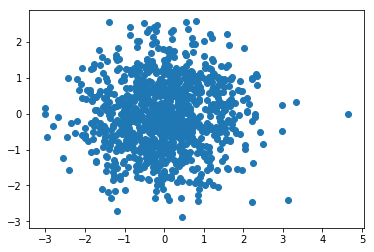

In [82]:
# Independent Normal distributions
x1=np.random.normal(0,1,1000)
x2=np.random.normal(0,1,1000)
plt.scatter(x1,x2)

In [83]:
d=np.random.multivariate_normal([0,0],[[1,-0.8],[-0.8, 1]], 10000)

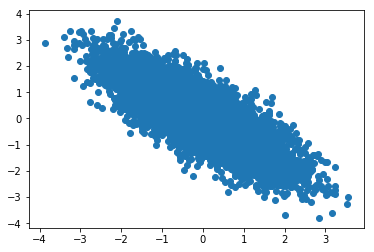

In [84]:
plt.scatter(d[:,0], d[:,1])

In [85]:
# Square Exponential Kernel (otherwise known as Gaussian)
def cov_kernel(x1,x2,h,lam):
    return h**2*np.exp(-1.*(x1-x2)**2/(lam**2))

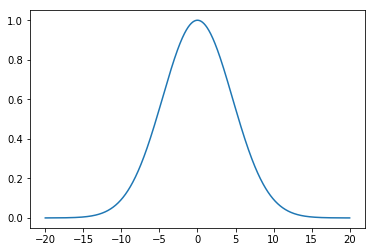

In [86]:
x=np.linspace(-20, 20.,1000)
y=np.exp(-1.*(x)**2/(6.5**2))

plt.plot(x,y)

In [87]:
y_train.min(), y_train.max()

(4.76717633338873, 23.41959730028479)

In [88]:
cov_kernel(x_train[0],x_train[2],h,lam)

0.6639157633354736

In [89]:
 #make_K(x_train,h,lam)

In [90]:
# Make covariance matrix from the covatriance kernel

def make_K(x,h,lam):
    K=np.zeros([len(x), len(x)])
    for i in range(len(x)):
        for j in range(len(x)):
            K[i,j]=cov_kernel(x[i], x[j], h, lam)
    return K

In [91]:
len(x1)

1000

In [92]:
x1=np.arange(0,20,0.01)
k=make_K(x1, 11, 5.)
y1=np.random.multivariate_normal(np.zeros(len(x1)),k)

# it looks like we are sampling from a joint normal distribution
# consisting of 2000 coordinates (components) but the covariance matrix is created from  covariance function. 


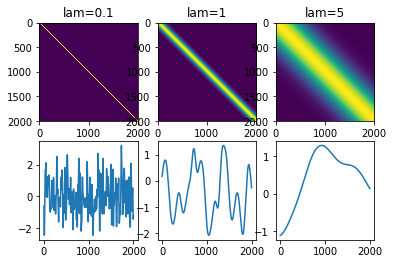

In [93]:
#plt.figure(figsize=(20 10))
f, ax = plt.subplots(2, 3)
ax[0, 0].imshow(make_K(x1, 1., 0.1))
ax[0, 0].set_title('lam=0.1')

ax[0, 1].imshow(make_K(x1, 1., 1.))
ax[0, 1].set_title('lam=1')


ax[0, 2].imshow(make_K(x1, 1., 5.))
ax[0, 2].set_title('lam=5')


d=np.random.multivariate_normal(np.zeros(len(x1)),make_K(x1, 1, 0.1), 1)
ax[1, 0].plot(d.squeeze())


d=np.random.multivariate_normal(np.zeros(len(x1)),make_K(x1, 1, 1.), 1)
ax[1, 1].plot(d.squeeze())


d=np.random.multivariate_normal(np.zeros(len(x1)),make_K(x1, 1, 5.),1)
ax[1, 2].plot(d.squeeze())
plt.show()

From the figure above when $\lambda $ increases, the covariance between the distant components increases (The samples drawn from component i, components i+n are relatively similar. n is proportional to lambda) which in turn results in smoother curves. 


In [94]:
# The covariance matrix in the left figure import numpy as npshows a high diagonal matrix (only high variancevalues) which means that if we draw data from the joint distribution the data will be independent.
# you can tell after you draw one sample from the joint distribution that the samples are independent. 

In [95]:
nx_training=10  # pick 10 coordinates/components
tmp=np.random.uniform(0,2000,nx_training)
tmp=tmp.astype(int)
condition=np.zeros_like(x1)


In [96]:
for i in tmp: 
    condition[i]=1.
sum(condition)

10.0

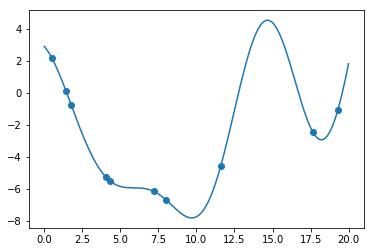

In [97]:
x_train=x1[np.where(condition==1.)]
y_train=y1[np.where(condition==1.)]

x_test=x1[np.where(condition==0.)]
y_test=y1[np.where(condition==0.)]

plt.plot(x1,y1)
plt.scatter(x_train, y_train)


In [98]:
# We are using the parameters used above.
# Ofcourse the are the best choice.
# When it comes to practice, we have to pick these parameters carefully. 

h, lam=1,5
K=make_K(x_train, h, lam)
iK=np.linalg.inv(K)


In [100]:
mu=[]; sig=[]
for xx in x_test:
    K_x=cov_kernel(xx, x_train, h, lam)
    K_xx=cov_kernel(xx,xx,h,lam)
    mu_xx=np.dot(K_x.T,np.dot(iK,y_train))
    sig_xx=K_xx-np.dot(K_x.T, np.dot(iK,K_x))
    mu.append(mu_xx)
    sig.append(np.sqrt(np.abs(sig_xx)))

In [ ]:
plt.plot(x1,y1,'-.b')
plt.scatter(x_train, y_train)

plt.plot(x_test, mu,'k')
plt.errorbar(x_test, mu, yerr=sig, capsize=0, color='g', alpha=0.03)
plt.legend([ 'True Data','Data', 'Predicted Mean'])


In [76]:
x_train=x1[np.where(condition==1.)]
y_train=y1[np.where(condition==1.)]+np.random.normal(0.,0.2,len(x_train))

sigma=1.
h, lam=1,5
K=make_K(x_train, h, lam)
iK=np.linalg.inv(K+sigma**2*np.identity(np.shape(K)[0]))


In [77]:
mu=[]; sig=[]
for xx in x_test:
    K_x=cov_kernel(xx, x_train, h, lam)
    K_xx=cov_kernel(xx,xx,h,lam)
    mu_xx=np.dot(K_x.T,np.dot(iK,y_train))
    sig_xx=K_xx+sigma**2-np.dot(K_x.T, np.dot(iK,K_x))
    mu.append(mu_xx)
    sig.append(np.sqrt(np.abs(sig_xx)))


In [79]:
K_x

array([0.37825149, 0.77567939, 0.88717236, 0.93267731, 0.99840128,
       0.99362044, 0.69600113, 0.5138335 , 0.26038343, 0.23353204])

ValueError: x and y must have same first dimension, but have shapes (1990,) and (1,)

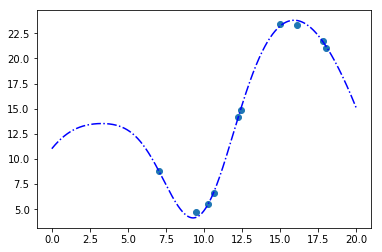

In [80]:
    
plt.plot(x1,y1,'-.b')
plt.scatter(x_train, y_train)

plt.plot(x_test, mu,'k')
plt.errorbar(x_test, mu, yerr=sig, capsize=0, color='g', alpha=0.03)
plt.legend([ 'True Data','Data', 'Predicted Mean'])


# Co2 Example

In [ ]:
def load_mauna_loa_atmospheric_c02():
    url = ('http://cdiac.ess-dive.lbl.gov/'
           'ftp/trends/co2/sio-keel-flask/maunaloa_c.dat')
    dates = []
    ppmvs = []
    with urlopen(url) as f:
        for line in f:
            line = line.decode('utf8')
            if not line.startswith('MLO'):
                # ignore headers
                continue
            station, date, weight, flag, ppmv = line.split()
            y = date[:2]
            m = date[2:4]
            d = date[4:]
            date = np.datetime64('%s%s-%s-%s' %
                                 ('20' if y < '20' else '19', y, m, d))
            dates.append(date)
            ppmvs.append(float(ppmv))
    dates = np.asarray(dates)
    # dates expressed as decimal years
    dates = dates.astype('float') / 365.2425 + 1970
    ppmvs = np.asarray(ppmvs)
    return dates.reshape(-1, 1), ppmvs

In [ ]:
X, y = load_mauna_loa_atmospheric_c02()

plt.plot(X,y)

In [ ]:
# Kernel with parameters given in GPML book
k1 = 66.0**2 * RBF(length_scale=67.0)  # long term smooth rising trend
k2 = 2.4**2 * RBF(length_scale=90.0)*ExpSineSquared(length_scale=1.3, periodicity=1.0)  # seasonal component
# medium term irregularity
k3 = 0.66**2* RationalQuadratic(length_scale=1.2, alpha=0.78)
k4 = 0.18**2 * RBF(length_scale=0.134)+ WhiteKernel(noise_level=0.19**2)  # noise terms

kernel_gpml = k1 + k2 + k3 + k4

gp = GaussianProcessRegressor(kernel=kernel_gpml, alpha=0,
                              optimizer=None, normalize_y=True)
gp.fit(X, y)

In [ ]:
print("GPML kernel: %s" % gp.kernel_)
print("Log-marginal-likelihood: %.3f" % gp.log_marginal_likelihood(gp.kernel_.theta))

In [ ]:
# Kernel with optimized parameters
k1 = 50.0**2 * RBF(length_scale=50.0)  # long term smooth rising trend
k2 = 2.0**2 * RBF(length_scale=100.0)* ExpSineSquared(length_scale=1.0, periodicity=1.0,periodicity_bounds="fixed")  # seasonal component

# medium term irregularities
k3 = 0.5**2 * RationalQuadratic(length_scale=1.0, alpha=1.0)
k4 = 0.1**2 * RBF(length_scale=0.1)+ WhiteKernel(noise_level=0.1**2,noise_level_bounds=(1e-3, np.inf))  # noise terms


kernel = k1 + k2 + k3 + k4

gp = GaussianProcessRegressor(kernel=kernel, alpha=0, normalize_y=True)
gp.fit(X, y)

print("\nLearned kernel: %s" % gp.kernel_)
print("Log-marginal-likelihood: %.3f"% gp.log_marginal_likelihood(gp.kernel_.theta))


In [ ]:
X_ = np.linspace(X.min(), X.max() + 30, 1000)[:, np.newaxis]
y_pred, y_std = gp.predict(X_, return_std=True)

# Illustration
plt.scatter(X, y, c='k')
plt.plot(X_, y_pred)
plt.fill_between(X_[:, 0], y_pred - y_std, y_pred + y_std,
                 alpha=0.5, color='k')
plt.xlim(X_.min(), X_.max())
plt.xlabel("Year")
plt.ylabel(r"CO$_2$ in ppm")
plt.title(r"Atmospheric CO$_2$ concentration at Mauna Loa")
plt.tight_layout()
plt.show()


References:

1- Prof: Anna Scaife, University of Manchester, https://www.youtube.com/watch?v=UpsV1y6wMQ8
